# Part c and d 

In [1]:
from functions import *
mplstyle.use(['ggplot', 'fast'])
# plt.rcParams.update({
#     "text.usetex": True,       
#     "font.family": "serif",    
#     "font.size": 10, 
# })

seed = np.random.seed(2018)

# Hyperparameters from part a and b:
polynomial_degree     = 20
number_of_data_points = 1000
lambda_               = 1e-5
# Hyperparameters from part c, d e and f:
learning_rate = 0.01
n_iterations  = 10000
tolerance     = 1e-7
use_tol       = True
beta          = 0.9
beta1         = 0.8
beta2         = 0.9
epsilon       = 1e-8
lambda_       = 0.01
batch_size    = 32

### Using shared functions to create dataset

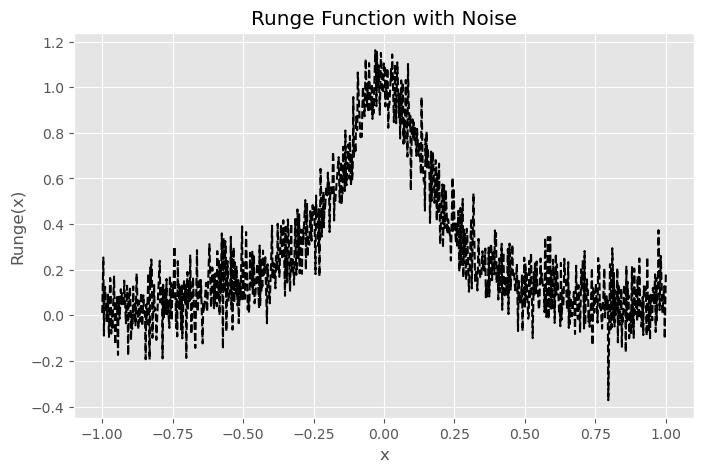

In [2]:
train, test, full = make_data(number_of_data_points, seed)
x, y = full[0], full[1]

plt.figure(figsize=(8, 5))
plt.plot(x, y, color='black', linestyle='--')
plt.title('Runge Function with Noise')
plt.xlabel('x')
plt.ylabel('Runge(x)')
plt.show()

In [3]:
# We start by splitting the data into training and test sets
x_train, x_test, y_train, y_test = train[0], test[0], train[1], test[1]
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)
x = x.reshape(-1, 1)

In [4]:
#X_train = PolynomialFeatures(degree=polynomial_degree, include_bias=True).fit_transform(x_train)
#X_test  = PolynomialFeatures(degree=polynomial_degree, include_bias=True).fit_transform(x_test)

In [5]:
# Create polynomial features
poly = PolynomialFeatures(degree=polynomial_degree, include_bias=True)
X_train_poly = poly.fit_transform(x_train)  # Transform training data
X_test_poly  = poly.transform(x_test)       # Transform test data

# Scale the polynomial features
scaler = StandardScaler(with_mean=False)  # or with_mean=True depending on your needs
scaler.fit(X_train_poly)  # Fit scaler only on training data
x_train_scaled = scaler.transform(X_train_poly)  # Scale training data
x_test_scaled  = scaler.transform(X_test_poly)   # Scale test data

In [6]:
X_train = x_train_scaled
X_test = x_test_scaled

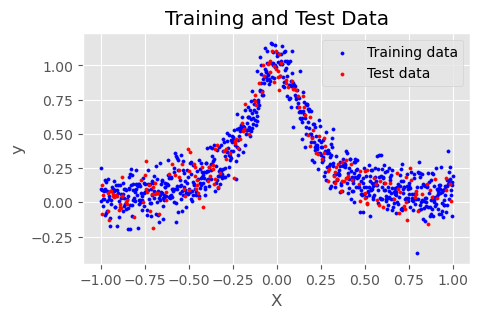

In [7]:
# Plot training data and test data
plt.figure(figsize=(5, 3))
plt.scatter(x_train, y_train, color='blue', s=5, label='Training data')
plt.scatter(x_test,  y_test,  color='red',  s=5, label='Test data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Test Data')
plt.legend()
plt.show()

## Part c: Writing your own gradient decent code 

Replace now the analytical expressions for the optimal parameters $\theta$ with your own gradient descent code. In this exercise we focus only on the simplest gradient descent approach with a fixed learning rate (excercises from week 37 and lecture notes from week 36).

Study and compare your results from parts a) and b) with your gradient descent approach. Discuss in particular the role of the learning rate.

OLS Analytical Solution : MSE = 0.000044, R2 = 0.911819
OLS Gradient Descent    : MSE = 0.000125, R2 = 0.750319


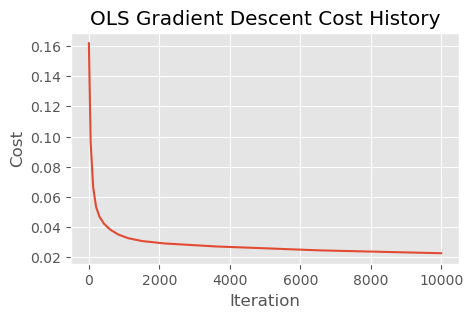

Converged after 5325 iterations.
Ridge Analytical Solution: MSE = 0.000063, R2 = 0.874537
Ridge Gradient Descent:    MSE = 0.000160, R2 = 0.680087


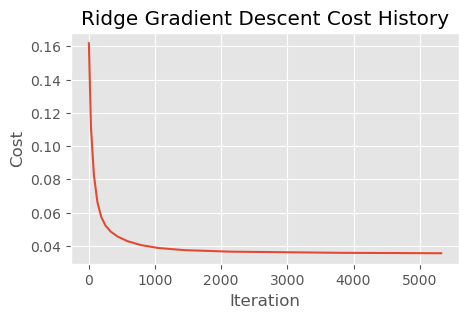

In [8]:
# OLS regression : 
# OLS analytical solution
theta_ols  = OLS_parameters(X_train, y_train)
y_pred_ols = X_test @ theta_ols
mse_ols    = MSE(y_test, y_pred_ols)
r2_ols     = R2(y_test, y_pred_ols)
# Gradient descent solution
theta_gd_ols, cost_history_ols = gradient_descent_ols(X_train, y_train, learning_rate, n_iterations, tolerance, use_tol)
y_pred_gd_ols = X_test @ theta_gd_ols
mse_gd_ols    = MSE(y_test, y_pred_gd_ols)
r2_gd_ols     = R2(y_test, y_pred_gd_ols)
# Print results
print(f"OLS Analytical Solution : MSE = {mse_ols:.6f}, R2 = {r2_ols:.6f}")
print(f"OLS Gradient Descent    : MSE = {mse_gd_ols:.6f}, R2 = {r2_gd_ols:.6f}")
# Plot cost history
plt.figure(figsize=(5, 3))
plt.plot(cost_history_ols)
plt.title("OLS Gradient Descent Cost History")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# RIDGE regression : 
# Analytical solution
beta_ridge   = Ridge_parameters(X_train, y_train, lambda_)
y_pred_ridge = X_test @ beta_ridge
mse_ridge    = MSE(y_test, y_pred_ridge)
r2_ridge     = R2(y_test, y_pred_ridge)
# Gradient descent solution
beta_gd_ridge, cost_history_ridge = gradient_descent_ridge(X_train, y_train, lambda_, learning_rate, n_iterations, tolerance, use_tol)
y_pred_gd_ridge = X_test @ beta_gd_ridge
mse_gd_ridge    = MSE(y_test, y_pred_gd_ridge)
r2_gd_ridge     = R2(y_test, y_pred_gd_ridge)
# Print results
print(f"Ridge Analytical Solution: MSE = {mse_ridge:.6f}, R2 = {r2_ridge:.6f}")
print(f"Ridge Gradient Descent:    MSE = {mse_gd_ridge:.6f}, R2 = {r2_gd_ridge:.6f}")
# Plot cost history
plt.figure(figsize=(5, 3))
plt.plot(cost_history_ridge)
plt.title("Ridge Gradient Descent Cost History")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

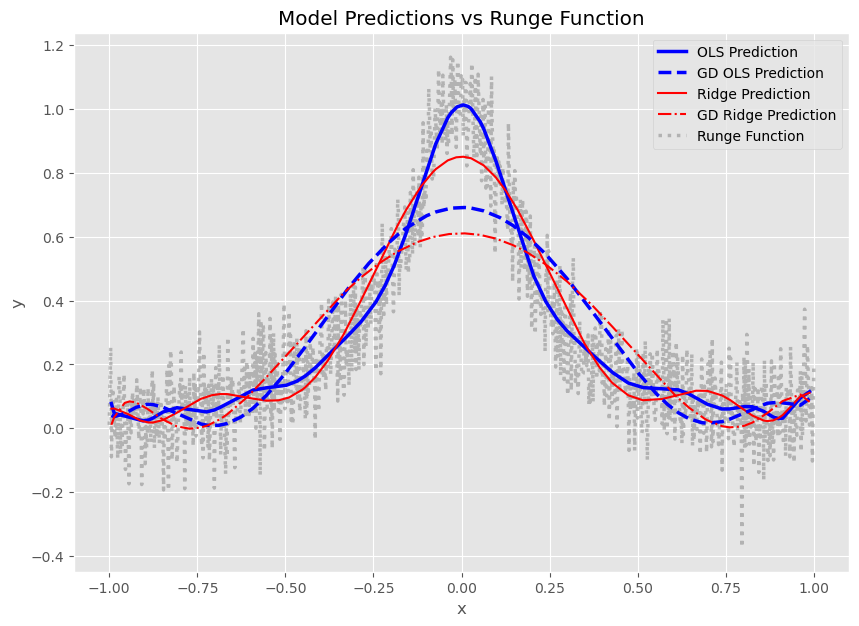

In [9]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(10, 7))
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices], color='blue', label='OLS Prediction', zorder=5, linewidth=2.5)
plt.plot(x_test[sort_indices], y_pred_gd_ols[sort_indices], color='blue', label='GD OLS Prediction', zorder=8, linewidth=2.5, linestyle='--')
plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices], color='red', label='Ridge Prediction', zorder=5, linewidth=1.5)
plt.plot(x_test[sort_indices], y_pred_gd_ridge[sort_indices], color='red', label='GD Ridge Prediction', zorder=8, linewidth=1.5, linestyle='-.')
# Also plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions vs Runge Function")
plt.legend()
plt.show()

## Part d: Including momentum and more advanced ways to update the learning the rate

We keep our focus on OLS and Ridge regression and update our code for
the gradient descent method by including **momentum**, **ADAgrad**,
**RMSprop** and **ADAM** as methods fro iteratively updating your learning
rate. Discuss the results and compare the different methods applied to
the one-dimensional Runge function. The lecture notes from week 37 contain several examples on how to implement these methods.

In [10]:
methods = ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']

In [11]:
results = {}
for method in methods:
    theta_OLS, cost_history_OLS     = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Ridge, cost_history_Ridge = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Lasso, cost_history_Lasso = gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    y_pred_OLS   = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS = MSE(y_test, y_pred_OLS)
    r2_OLS = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso = R2(y_test, y_pred_Lasso)
    results[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge : {method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso : {method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

gd converged after 5325 iterations.
gd converged after 1189 iterations.
OLS   : gd: MSE = 0.000125, R2 = 0.750319
Ridge : gd: MSE = 0.000160, R2 = 0.680087
Lasso : gd: MSE = 0.000199, R2 = 0.600283

momentum converged after 5325 iterations.
momentum converged after 1983 iterations.
OLS   : momentum: MSE = 0.000125, R2 = 0.750306
Ridge : momentum: MSE = 0.000160, R2 = 0.680108
Lasso : momentum: MSE = 0.000187, R2 = 0.624431

OLS   : adagrad: MSE = 0.000855, R2 = -0.714969
Ridge : adagrad: MSE = 0.000855, R2 = -0.714959
Lasso : adagrad: MSE = 0.000857, R2 = -0.717550

rmsprop converged after 8803 iterations.
rmsprop converged after 5201 iterations.
OLS   : rmsprop: MSE = 0.000131, R2 = 0.736612
Ridge : rmsprop: MSE = 0.000155, R2 = 0.689098
Lasso : rmsprop: MSE = 0.000205, R2 = 0.588985

adam converged after 8591 iterations.
adam converged after 5750 iterations.
OLS   : adam: MSE = 0.000130, R2 = 0.738956
Ridge : adam: MSE = 0.000155, R2 = 0.690113
Lasso : adam: MSE = 0.000187, R2 = 0.62

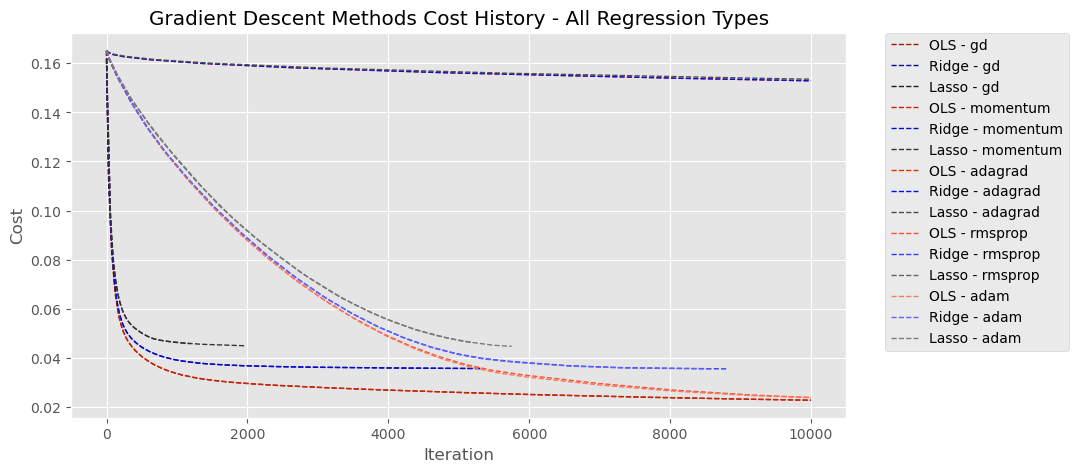

In [12]:
# # Plot cost history for all methods
# plt.figure(figsize=(8, 5))
# for method in methods:
#     plt.plot(results[method]['cost_history_OLS'], label=method, linewidth=2, linestyle='--', alpha=1)
# plt.title("Gradient Descent Methods Cost History - OLS")
# plt.xlabel("Iteration")
# plt.ylabel("Cost")
# plt.legend()
# plt.show()
# plt.figure(figsize=(8, 5))
# for method in methods:
#     plt.plot(results[method]['cost_history_Ridge'], label=method, linewidth=2, linestyle='--', alpha=1)
# plt.title("Gradient Descent Methods Cost History - Ridge")
# plt.xlabel("Iteration")
# plt.ylabel("Cost")
# plt.legend()
# plt.show()
# plt.figure(figsize=(8, 5))
# for method in methods:
#     plt.plot(results[method]['cost_history_Lasso'], label=method, linewidth=2, linestyle='--', alpha=1)
# plt.title("Gradient Descent Methods Cost History - Lasso")
# plt.xlabel("Iteration")
# plt.ylabel("Cost")
# plt.legend()
# plt.show()

# Same plots for all regression types in one figure, with one linestyles per regression type, and different colors for the different  methods
plt.figure(figsize=(10, 5))
colors_OLS   = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': '#FC775F'}
colors_Ridge = {'gd': '#0308A0', 'momentum': '#040BCD', 'adagrad': '#050DED', 'rmsprop': '#3239FB', 'adam': '#5F64FC'}
colors_Lasso = {'gd': '#1D1D1D', 'momentum': '#353535', 'adagrad': '#4C4C4C', 'rmsprop': '#646464', 'adam': '#7C7C7C'}
for method in methods:
    plt.plot(results[method]['cost_history_OLS'],   label=f'OLS - {method}',   linewidth=1, linestyle='--', color=colors_OLS[method])
    plt.plot(results[method]['cost_history_Ridge'], label=f'Ridge - {method}', linewidth=1, linestyle='--', color=colors_Ridge[method])
    plt.plot(results[method]['cost_history_Lasso'], label=f'Lasso - {method}', linewidth=1, linestyle='--', color=colors_Lasso[method])
plt.title("Gradient Descent Methods Cost History - All Regression Types")
plt.xlabel("Iteration")
plt.ylabel("Cost")  
# Making the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

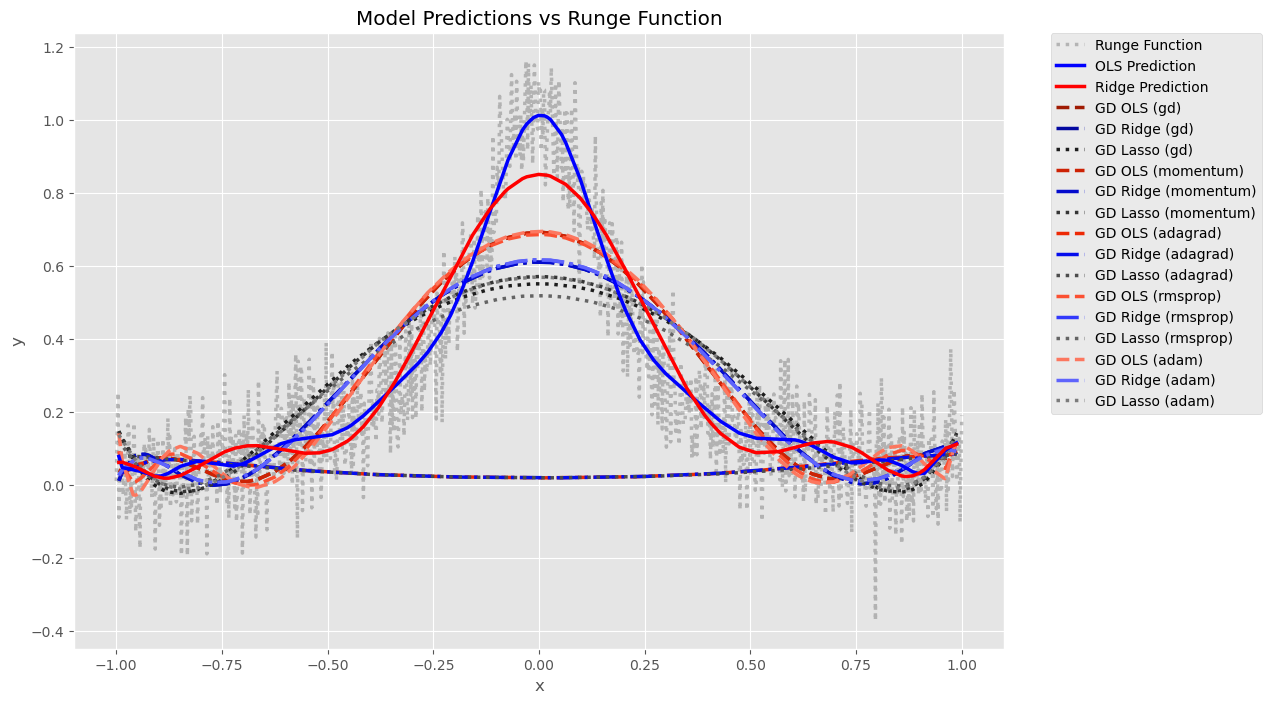

In [13]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(12, 8))
# Plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],   color='blue', label='OLS Prediction',   zorder=5, linewidth=2.5, linestyle='-')
plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices], color='red',  label='Ridge Prediction', zorder=8, linewidth=2.5, linestyle='-')
#plt.plot(x_test[sort_indices], y_pred_Lasso[sort_indices], color='Black',  label='Lasso Prediction', zorder=8, linewidth=2.5, linestyle='-')
colors_OLS   = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': '#FC775F'}
colors_Ridge = {'gd': '#0308A0', 'momentum': '#040BCD', 'adagrad': '#050DED', 'rmsprop': '#3239FB', 'adam': '#5F64FC'}
colors_Lasso = {'gd': '#1D1D1D', 'momentum': '#353535', 'adagrad': '#4C4C4C', 'rmsprop': '#646464', 'adam': '#7C7C7C'}
for method in methods:
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_OLS'],   label=f'GD OLS ({method})',   linewidth=2.5, linestyle='--', color=colors_OLS[method])
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=2.5, linestyle='-.', color=colors_Ridge[method])
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=2.5, linestyle=':', color=colors_Lasso[method])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions vs Runge Function")
# Making the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()